# Lending Club - EDA

 ##### Objective: Extracting the key factors driving charged off customers

### Importing the required libraries

In [1]:
import pandas as pd # Data manipulation
import numpy as np  # numerical operations
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline 
import warnings # ignoring warnings
warnings.filterwarnings("ignore")
import calendar # To get the week day

### Loading the dataset

In [2]:
df = pd.read_csv("loan.csv")
print("Rows and Columns of the data: ", df.shape)
print("Unique loan ID's in the data: ", df['id'].nunique())
pd.options.display.max_columns=120
df.head(2)

Rows and Columns of the data:  (39717, 111)
Unique loan ID's in the data:  39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Removing the variables with 100% missing observations

In [3]:
columns_missing_completly = list(df.isna().sum()[df.isna().sum()==df.shape[0]].index)
print("There are",len(columns_missing_completly), "variables have no entries (100% missing)")
print("\n",columns_missing_completly)

There are 54 variables have no entries (100% missing)

 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'tota

In [4]:
columns_with_data = [i for i in df.columns if i not in columns_missing_completly]
print("There are",len(columns_with_data), "variables have data")
print("\n",columns_with_data)

There are 57 variables have data

 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


### Data with 57 variables without 100% missing variables 

In [5]:
df = df[columns_with_data]
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
missing_variables = round(df.isna().mean()[df.isna().mean() !=0].sort_values(ascending=False)*100,2)
print(len(missing_variables),"variables with missing records after eliminating variables with 100% missing")
missing_variables_df = pd.DataFrame(missing_variables).rename(columns={0:"% Missing"})
missing_variables_df

14 variables with missing records after eliminating variables with 100% missing


,% Missing
next_pymnt_d,97.13
mths_since_last_record,92.99
mths_since_last_delinq,64.66
desc,32.58
emp_title,6.19
emp_length,2.71
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14


### Top 3 variables have more than 60% of missing records, which may not help in imputing. Dropping these variables

In [7]:
df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)
print("Variables post dropping these 3 variables", df.shape[1],"variables are left")

Variables post dropping these 3 variables 54 variables are left


In [8]:
missing_variables = round(df.isna().mean()[df.isna().mean() !=0].sort_values(ascending=False)*100,2)
print(len(missing_variables),"variables with missing records\n")
missing_variables_df = pd.DataFrame(missing_variables).rename(columns={0:"% Missing"})
missing_variables_df['Missing_count'] = [df[i].isna().sum() for i in df[list(missing_variables_df.index)]]
missing_variables_df['Unique_count'] = [df[i].nunique() for i in df[list(missing_variables_df.index)]]
missing_variables_df['variable_type'] = [df[i].dtype for i in df[list(missing_variables_df.index)]]
missing_variables_df.sort_values(by='variable_type', ascending=False, inplace=True)
missing_variables_df

11 variables with missing records



,% Missing,Missing_count,Unique_count,variable_type
desc,32.58,12940,26527,object
emp_title,6.19,2459,28820,object
emp_length,2.71,1075,11,object
last_pymnt_d,0.18,71,101,object
revol_util,0.13,50,1089,object
title,0.03,11,19615,object
last_credit_pull_d,0.01,2,106,object
pub_rec_bankruptcies,1.75,697,3,float64
collections_12_mths_ex_med,0.14,56,1,float64
chargeoff_within_12_mths,0.14,56,1,float64


### Handling Missing values with categorical types

In [9]:
df[list(missing_variables_df.index[:7])].head(10)

,desc,emp_title,emp_length,last_pymnt_d,revol_util,title,last_credit_pull_d
0,Borrower added on 12/22/11 > I need to upgra...,NaN,10+ years,Jan-15,83.70%,Computer,May-16
1,Borrower added on 12/22/11 > I plan to use t...,Ryder,< 1 year,Apr-13,9.40%,bike,Sep-13
2,NaN,NaN,10+ years,Jun-14,98.50%,real estate business,May-16
3,Borrower added on 12/21/11 > to pay for prop...,AIR RESOURCES BOARD,10+ years,Jan-15,21%,personel,Apr-16
4,Borrower added on 12/21/11 > I plan on combi...,University Medical Group,1 year,May-16,53.90%,Personal,May-16
5,NaN,Veolia Transportaton,3 years,Jan-15,28.30%,My wedding loan I promise to pay back,Jan-16
6,Borrower added on 12/18/11 > I am planning o...,Southern Star Photography,8 years,May-16,85.60%,Loan,May-16
7,Borrower added on 12/16/11 > Downpayment for...,MKC Accounting,9 years,Jan-15,87.50%,Car Downpayment,Dec-14
8,Borrower added on 12/21/11 > I own a small h...,NaN,4 years,Apr-12,32.60%,Expand Business & Buy Debt Portfolio,Aug-12
9,Borrower added on 12/16/11 > I'm trying to b...,Starbucks,< 1 year,Nov-12,36.50%,Building my credit history.,Mar-13


### Revol_util is the number type but because of % it stored as object type

In [10]:
df['revol_util_per'] = df['revol_util'].apply(lambda x: str(x).replace("%","")).astype("float")
del df['revol_util']
df['revol_util_per'].isna().sum()

50

In [11]:
missing_variables = round(df.isna().mean()[df.isna().mean() !=0].sort_values(ascending=False)*100,2)
print(len(missing_variables),"variables with missing records\n")
missing_variables_df = pd.DataFrame(missing_variables).rename(columns={0:"% Missing"})
missing_variables_df['Missing_count'] = [df[i].isna().sum() for i in df[list(missing_variables_df.index)]]
missing_variables_df['Unique_count'] = [df[i].nunique() for i in df[list(missing_variables_df.index)]]
missing_variables_df['variable_type'] = [df[i].dtype for i in df[list(missing_variables_df.index)]]
missing_variables_df.sort_values(by='variable_type', ascending=False, inplace=True)
missing_variables_df

11 variables with missing records



,% Missing,Missing_count,Unique_count,variable_type
desc,32.58,12940,26527,object
emp_title,6.19,2459,28820,object
emp_length,2.71,1075,11,object
last_pymnt_d,0.18,71,101,object
title,0.03,11,19615,object
last_credit_pull_d,0.01,2,106,object
pub_rec_bankruptcies,1.75,697,3,float64
collections_12_mths_ex_med,0.14,56,1,float64
chargeoff_within_12_mths,0.14,56,1,float64
revol_util_per,0.13,50,1089,float64


In [12]:
df[list(missing_variables_df.index[:6])].head(10)

,desc,emp_title,emp_length,last_pymnt_d,title,last_credit_pull_d
0,Borrower added on 12/22/11 > I need to upgra...,NaN,10+ years,Jan-15,Computer,May-16
1,Borrower added on 12/22/11 > I plan to use t...,Ryder,< 1 year,Apr-13,bike,Sep-13
2,NaN,NaN,10+ years,Jun-14,real estate business,May-16
3,Borrower added on 12/21/11 > to pay for prop...,AIR RESOURCES BOARD,10+ years,Jan-15,personel,Apr-16
4,Borrower added on 12/21/11 > I plan on combi...,University Medical Group,1 year,May-16,Personal,May-16
5,NaN,Veolia Transportaton,3 years,Jan-15,My wedding loan I promise to pay back,Jan-16
6,Borrower added on 12/18/11 > I am planning o...,Southern Star Photography,8 years,May-16,Loan,May-16
7,Borrower added on 12/16/11 > Downpayment for...,MKC Accounting,9 years,Jan-15,Car Downpayment,Dec-14
8,Borrower added on 12/21/11 > I own a small h...,NaN,4 years,Apr-12,Expand Business & Buy Debt Portfolio,Aug-12
9,Borrower added on 12/16/11 > I'm trying to b...,Starbucks,< 1 year,Nov-12,Building my credit history.,Mar-13


### Dropping  desc, emp_title and title categorical variables due to lot of unique categories. More unique categories may not bring any story

In [13]:
df.drop(['desc','emp_title','title'], axis=1, inplace=True)

In [14]:
df[df['emp_length'].isna()][:5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,revol_util_per
168,1067644,1302032,2500,2500,2500.0,36 months,7.51%,77.78,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,961xx,CA,16.30,0,Aug-94,2,13,0,4853,20,f,0.0,0.0,1838.880000,1838.88,1575.06,253.74,0.0,10.08,0.0000,Dec-13,77.78,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,42.2
323,1058717,1290516,18000,18000,18000.0,60 months,17.58%,452.98,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,363xx,AL,21.96,0,Mar-03,1,11,0,5945,28,f,0.0,0.0,26378.550010,26378.55,18000.00,8378.55,0.0,0.00,0.0000,Sep-15,6909.59,Sep-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,83.7
394,1064582,1298394,4000,4000,4000.0,36 months,11.71%,132.31,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,328xx,FL,7.50,1,Feb-05,0,4,0,1593,6,f,0.0,0.0,4186.023030,4186.02,4000.00,186.02,0.0,0.00,0.0000,May-12,3658.15,May-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,54.9
422,1064366,1298164,1000,1000,1000.0,36 months,14.65%,34.50,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,080xx,NJ,6.00,0,Apr-93,2,3,1,2510,8,f,0.0,0.0,91.310000,91.31,22.24,12.18,0.0,56.89,10.2402,Jan-12,34.50,Jun-12,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,83.7
439,1063912,1296491,8250,8250,8250.0,36 months,7.51%,256.67,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,218xx,MD,17.87,0,Dec-81,4,17,0,7521,37,f,0.0,0.0,9239.889998,9239.89,8250.00,989.89,0.0,0.00,0.0000,Dec-14,278.92,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.4


### Replacing the missing values with mode for emp_lengh, last_paymnt_d and last_credit_pull_d

In [15]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0])
df[['emp_length','last_pymnt_d','last_credit_pull_d']].isna().sum()

emp_length            0
last_pymnt_d          0
last_credit_pull_d    0
dtype: int64

### Handling Missing values with numerical types

In [16]:
missing_variables = round(df.isna().mean()[df.isna().mean() !=0].sort_values(ascending=False)*100,2)
print(len(missing_variables),"variables with missing records\n")
missing_variables_df = pd.DataFrame(missing_variables).rename(columns={0:"% Missing"})
missing_variables_df['Missing_count'] = [df[i].isna().sum() for i in df[list(missing_variables_df.index)]]
missing_variables_df['Unique_count'] = [df[i].nunique() for i in df[list(missing_variables_df.index)]]
missing_variables_df['variable_type'] = [df[i].dtype for i in df[list(missing_variables_df.index)]]
missing_variables_df.sort_values(by='variable_type', ascending=False, inplace=True)
missing_variables_df

5 variables with missing records



,% Missing,Missing_count,Unique_count,variable_type
pub_rec_bankruptcies,1.75,697,3,float64
collections_12_mths_ex_med,0.14,56,1,float64
chargeoff_within_12_mths,0.14,56,1,float64
revol_util_per,0.13,50,1089,float64
tax_liens,0.10,39,1,float64


### Imputing the missing values with median

In [17]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median())
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(df['chargeoff_within_12_mths'].median())
df['revol_util_per'] = df['revol_util_per'].fillna(df['revol_util_per'].median())
df['tax_liens'] = df['tax_liens'].fillna(df['tax_liens'].median())
df[list(missing_variables_df.index)].isna().sum()

pub_rec_bankruptcies          0
collections_12_mths_ex_med    0
chargeoff_within_12_mths      0
revol_util_per                0
tax_liens                     0
dtype: int64

### Checking variables with only one category. This may not be usefull in our analysis

In [18]:
var_with_single_enry=[]
d = {}
for i in df.columns:
    if df[i].nunique()==1:
        var_with_single_enry.append(i)
print(var_with_single_enry)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [19]:
for i in var_with_single_enry:
    print(df[i].value_counts())

n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39717
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39717
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39717
Name: tax_liens, dtype: int64


In [20]:
df[var_with_single_enry]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
39713,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
39714,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
39715,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [21]:
df.drop(var_with_single_enry, axis=1, inplace=True)
print("Data frame dimensions post dropping 9 variables with single category: ", df.shape)

Data frame dimensions post dropping 9 variables with single category:  (39717, 42)


In [22]:
var_with_all_distinct_entry=[]
d = {}
for i in df.columns:
    if df[i].nunique()==df.shape[0]:
        var_with_all_distinct_entry.append(i)
print(var_with_all_distinct_entry)

['id', 'member_id', 'url']


In [23]:
for i in var_with_all_distinct_entry:
    print(i,df[i].nunique())

id 39717
member_id 39717
url 39717


### Checking weather all URL's are from https or different domain

In [24]:
df['url'].apply(lambda x: x[:5]).value_counts()

https    39717
Name: url, dtype: int64

#Seems to be all URL's from https

### Let's drop these 2 variables and keep id for reference

In [25]:
df.drop(['member_id', 'url'], axis=1, inplace=True)
print("Data frame dimensions post dropping additional 2 variables with unique entries: ", df.shape)

Data frame dimensions post dropping additional 2 variables with unique entries:  (39717, 40)


In [26]:
df.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_per
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,83.7
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,9.4
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0,98.5


### Dependent variable is loan_status

In [27]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Let's drop the current category in the loan status, as these records are not- defaulters

In [28]:
df1 = df.loc[df['loan_status']!="Current"]
print("Dimesions of data after excluding Currently running loans", df1.shape)

Dimesions of data after excluding Currently running loans (38577, 40)


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

In [30]:
# pandas_profiling.ProfileReport(df1)

In [31]:
df1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_per
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,83.7
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,9.4


### Rechecking unique enties in all the variables 

In [32]:
df1.nunique().sort_values()

out_prncp                      1
out_prncp_inv                  1
term                           2
loan_status                    2
verification_status            3
pub_rec_bankruptcies           3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     370
earliest_cr_line             524
zip_code                     822
loan_amnt                    870
funded_amnt                 1019
revol_util_per              1088
total_rec_late_fee          1320
collection_recovery_fee     2616
dti                         2853
recoveries                  4040
annual_inc

### After removing cuurent loans, out_prncp and out_prncp_inv variables have single entry, let's drop those

In [33]:
df1.drop(['out_prncp','out_prncp_inv'], axis=1, inplace=True)
print("Dimesions of data", df1.shape)

Dimesions of data (38577, 38)


In [34]:
df1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_per
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,83.7
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,9.4


### Creating new variables and cleaning

In [35]:
df1['int_rate'] = df1['int_rate'].str.strip("%").astype("float")

In [36]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format="%b-%y")
df1['issue_d'] = df1['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)

df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format="%b-%y")
df1['earliest_cr_line'] = df1['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2022 else x)

In [37]:
df1['issue_d_year'] = df1['issue_d'].dt.year
df1['issue_d_year'] = df1['issue_d_year'].astype("object")
df1['issue_d_month'] = df1['issue_d'].dt.strftime("%b")
df1['issue_d_weekday'] = df1['issue_d'].dt.weekday.apply(lambda x: calendar.day_name[x])

df1['earliest_cr_line_year'] = df1['earliest_cr_line'].dt.year
df1['earliest_cr_line_year'] = df1['earliest_cr_line_year'].astype("object")
df1['earliest_cr_line_month'] = df1['earliest_cr_line'].dt.strftime("%b")
df1['earliest_cr_line_weekday'] = df1['earliest_cr_line'].dt.weekday.apply(lambda x: calendar.day_name[x])

In [38]:
df1['approved_loan_amount_ratio'] = round((df1['funded_amnt_inv']/df1['loan_amnt'])*100,2)

In [39]:
df1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_per,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_weekday,approved_loan_amount_ratio
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0,83.7,2011,Dec,Thursday,1985,Jan,Tuesday,99.5
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,9.4,2011,Dec,Thursday,1999,Apr,Thursday,100.0


### univariate Analysis

In [40]:
df1.nunique().sort_values()

loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
issue_d_year                      5
pub_rec                           5
grade                             7
issue_d_weekday                   7
earliest_cr_line_weekday          7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
earliest_cr_line_month           12
issue_d_month                    12
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
earliest_cr_line_year            53
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                        370
earliest_cr_line                524
zip_code                        822
loan_amnt                   

In [41]:
pd.options.display.float_format='{:,.0f}'.format

### 1. Analyzing the numerical data

In [42]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'revol_util_per',
       'issue_d_year', 'issue_d_month', 'issue_d_weekday',
       'earliest_cr_line_year', 'earliest_cr_line_month',
       'earliest_cr_line_weekday', 'approved_loan_amount_ratio'],
      dtype='object')

In [43]:
num_variable_list = ['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate','annual_inc','dti','installment','approved_loan_amount_ratio']

                                                    Variable :  loan_amnt
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count   mean   std  min   25%   50%    75%    95%    99%    max
loan_amnt 38,577 11,047 7,348  500 5,300 9,600 15,000 25,000 35,000 35,000
----------------------------------------------------------------------------------------------------------------


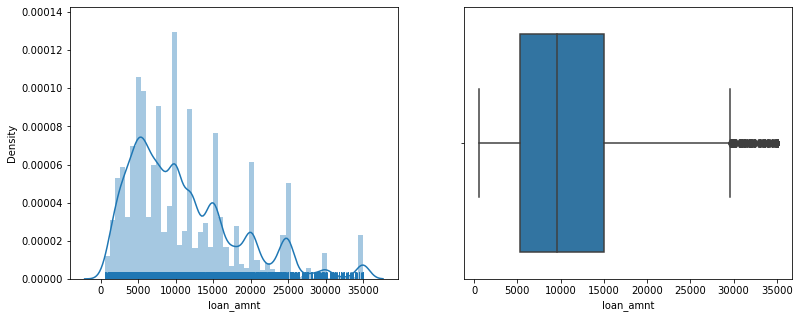

                                                    Variable :  funded_amnt
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count   mean   std  min   25%   50%    75%    95%    99%    max
funded_amnt 38,577 10,784 7,090  500 5,200 9,550 15,000 25,000 35,000 35,000
----------------------------------------------------------------------------------------------------------------


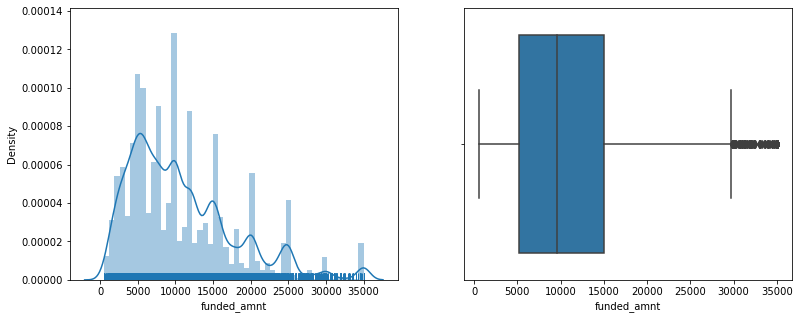

                                                    Variable :  funded_amnt_inv
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count   mean   std  min   25%   50%    75%    95%    99%  \
funded_amnt_inv 38,577 10,222 7,023    0 5,000 8,733 14,000 24,500 34,715   

                   max  
funded_amnt_inv 35,000  
----------------------------------------------------------------------------------------------------------------


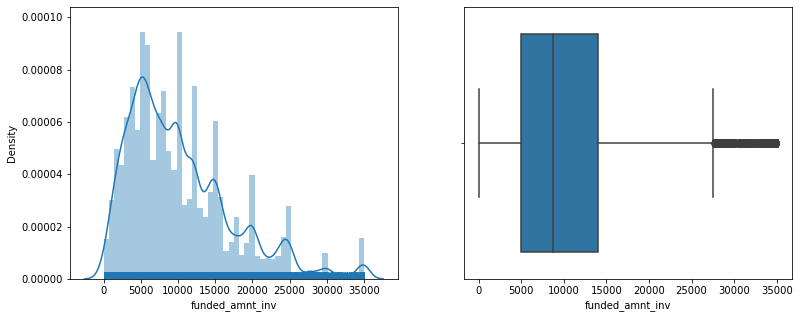

                                                    Variable :  int_rate
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
          count  mean  std  min  25%  50%  75%  95%  99%  max
int_rate 38,577    12    4    5    9   12   14   18   21   24
----------------------------------------------------------------------------------------------------------------


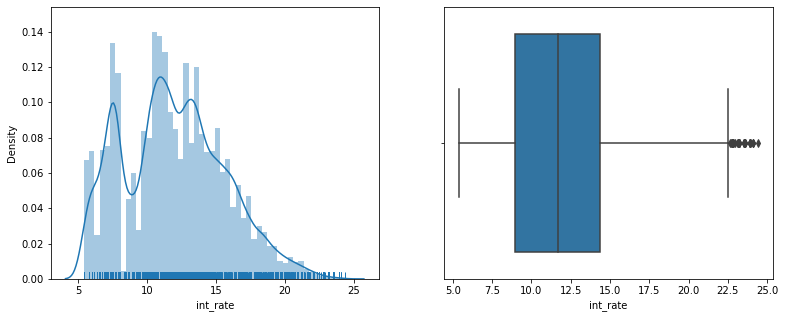

                                                    Variable :  annual_inc
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count   mean    std   min    25%    50%    75%     95%     99%  \
annual_inc 38,577 68,778 64,219 4,000 40,000 58,868 82,000 140,004 234,144   

                 max  
annual_inc 6,000,000  
----------------------------------------------------------------------------------------------------------------


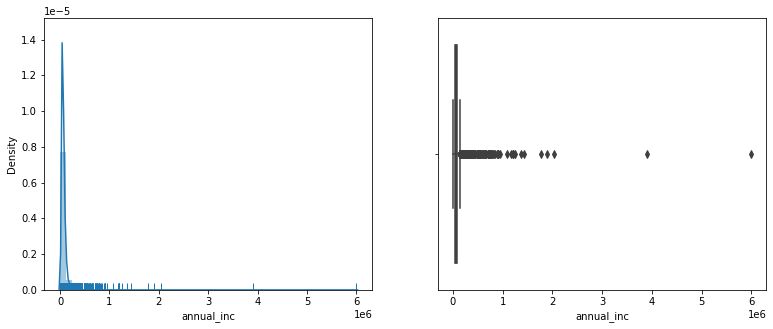

                                                    Variable :  dti
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
     count  mean  std  min  25%  50%  75%  95%  99%  max
dti 38,577    13    7    0    8   13   19   24   27   30
----------------------------------------------------------------------------------------------------------------


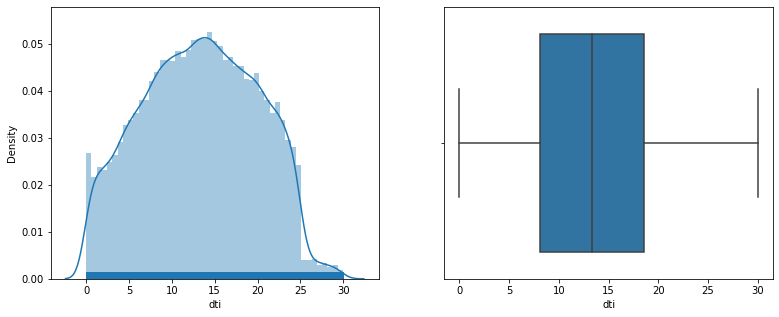

                                                    Variable :  installment
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  95%  99%   max
installment 38,577   322  209   16  166  278  426  761  931 1,305
----------------------------------------------------------------------------------------------------------------


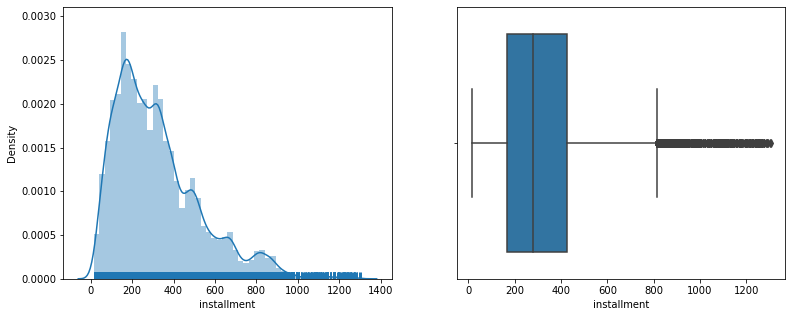

                                                    Variable :  approved_loan_amount_ratio
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                            count  mean  std  min  25%  50%  75%  95%  99%  \
approved_loan_amount_ratio 38,577    94   17    0   98  100  100  100  100   

                            max  
approved_loan_amount_ratio  100  
----------------------------------------------------------------------------------------------------------------


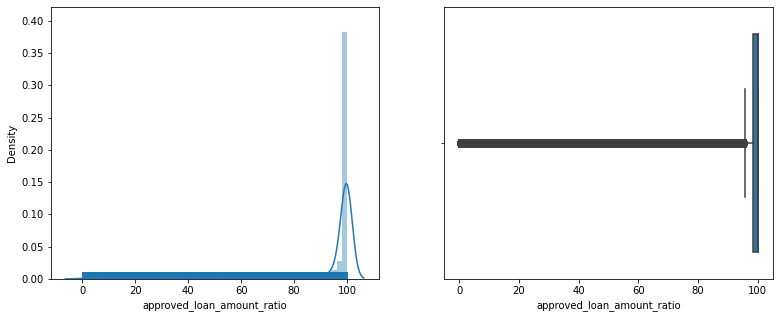

In [44]:
for i in num_variable_list:
    print("                                                    Variable : ",i)
    print("----------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    p1 = sns.distplot(df1[i], rug=True)
    plt.subplot(1,3,2)
    p2 =sns.boxplot(df1[i], orient="V")
    print("Descriptive statistics : ")
    print("----------------------------")
    print(pd.DataFrame(df1[i].describe(percentiles=[0.25,0.75,0.95,0.99])).T)
    print("----------------------------------------------------------------------------------------------------------------")
    plt.show()
    print("================================================================================================================")

### Assuming the all the currency variables are in USD

##### Supporting points for my observations

In [45]:
print("Borrowers whose annual income greater than 234k USD: ",len(df1[df1['annual_inc']>np.percentile(df1['annual_inc'], 99)]))

Borrowers whose annual income greater than 234k USD:  386


In [46]:
print("% of Borrowers whose got atleast 99% of requested loan amount: ",round(df1[df1['approved_loan_amount_ratio']>=99].shape[0]/df1.shape[0],2)*100,"%")

% of Borrowers whose got atleast 99% of requested loan amount:  70.0 %


### 1. Observations - Numeric Data

#### 1) loan_amnt: Nearly half of the population took the loan of about 10K USD. Only 5% of applicant are taking 25k+ USD
#### 2) funded_amnt: With the slight variation, this variable behaves same as loan amount. This indicates lending club approved all the applied loan amount
#### 3) funded_amnt_inv: Funded amount invested variable behaves same as loan amount. This tells the same story as above
#### 4) int_rate: Lending club offering most of loans with the interest rate ranging between 9 to 14%. Maximum interest charged is about 22.5%, after excluding outliers
#### 5) annual_inc: 99% of borrowers are having income less than 234k USD. Only 386 borrowers have more than 234k USD.
#### 6) dti(Debt to Income): All  the loans are given to borrowers have Debt to Income ratio less than 30. Looks like normal distribution. 
#### 7) installment: Most borrowers installment amount is about 280 USD
#### 8) approved_loan_amount_ratio: 70% of borrowers got atleast 99% of requested loan amount

### 2. Analyzing Categorical data - Univariate

In [47]:
df1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,revol_util_per,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_weekday,approved_loan_amount_ratio
0,1077501,5000,5000,"4,975",36 months,11,163,B,B2,10+ years,RENT,"24,000",Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,28,0,1985-01-01,1,3,0,13648,9,"5,863","5,834","5,000",863,0,0,0,Jan-15,172,May-16,0,84,2011,Dec,Thursday,1985,Jan,Tuesday,100
1,1077430,2500,2500,"2,500",60 months,15,60,C,C4,< 1 year,RENT,"30,000",Source Verified,2011-12-01,Charged Off,car,309xx,GA,1,0,1999-04-01,5,3,0,1687,4,"1,009","1,009",456,435,0,117,1,Apr-13,120,Sep-13,0,9,2011,Dec,Thursday,1999,Apr,Thursday,100


In [48]:
cat_variable_list = ['loan_status','term','grade', 'sub_grade','emp_length', 'home_ownership','verification_status','purpose', 'addr_state','delinq_2yrs','pub_rec','pub_rec_bankruptcies','addr_state','issue_d_year', 'issue_d_month', 'issue_d_weekday','earliest_cr_line_year', 'earliest_cr_line_month',]

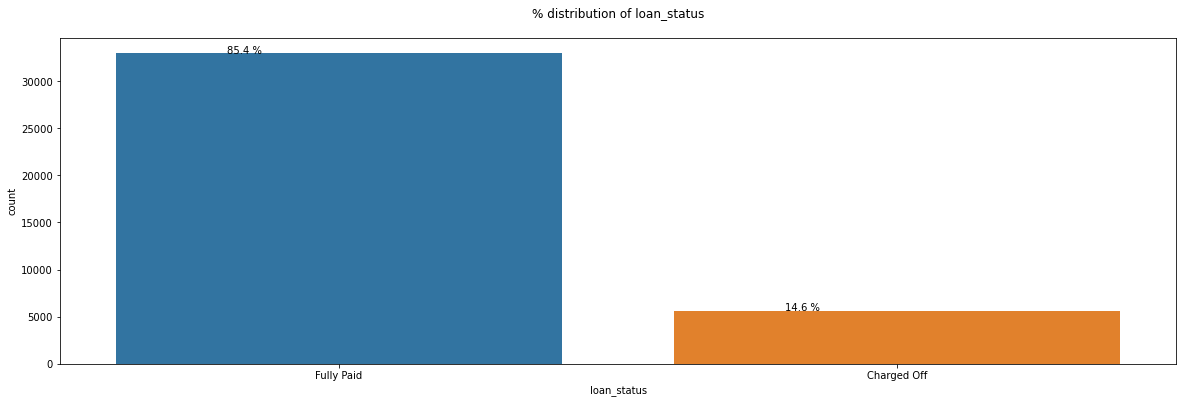

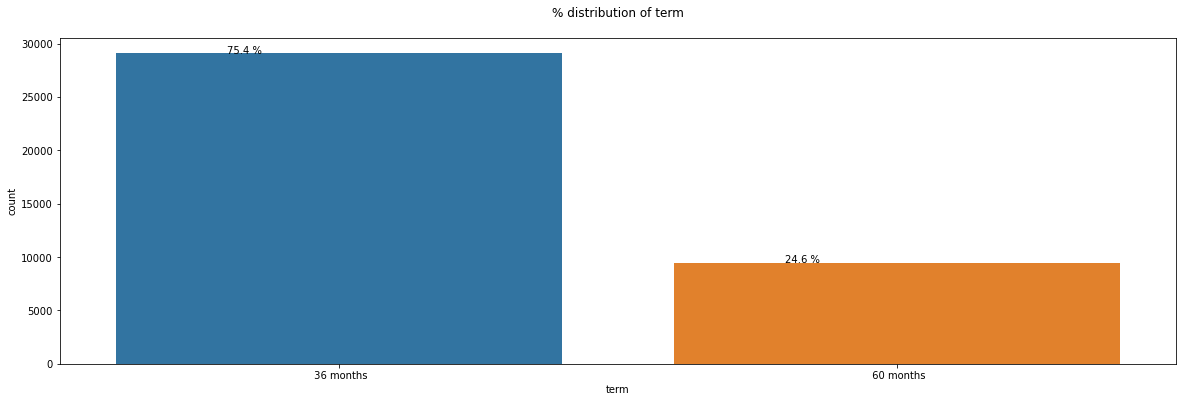

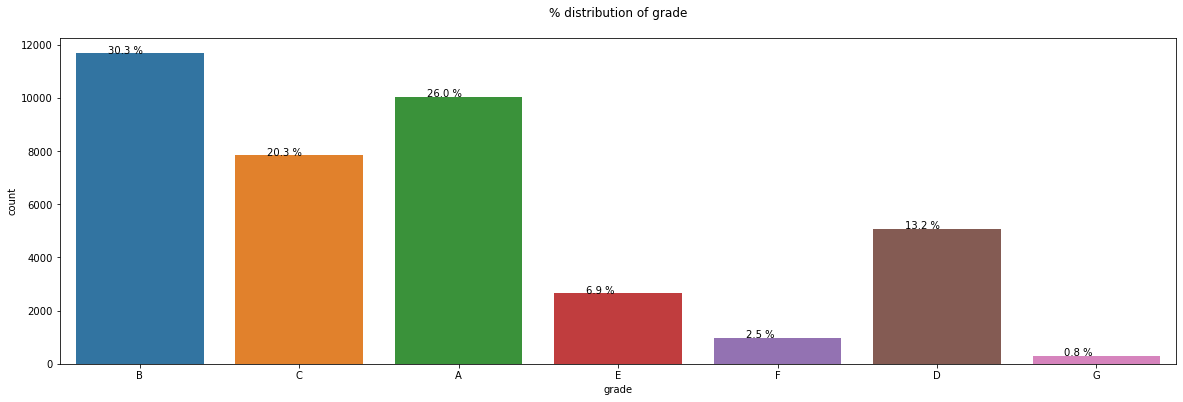

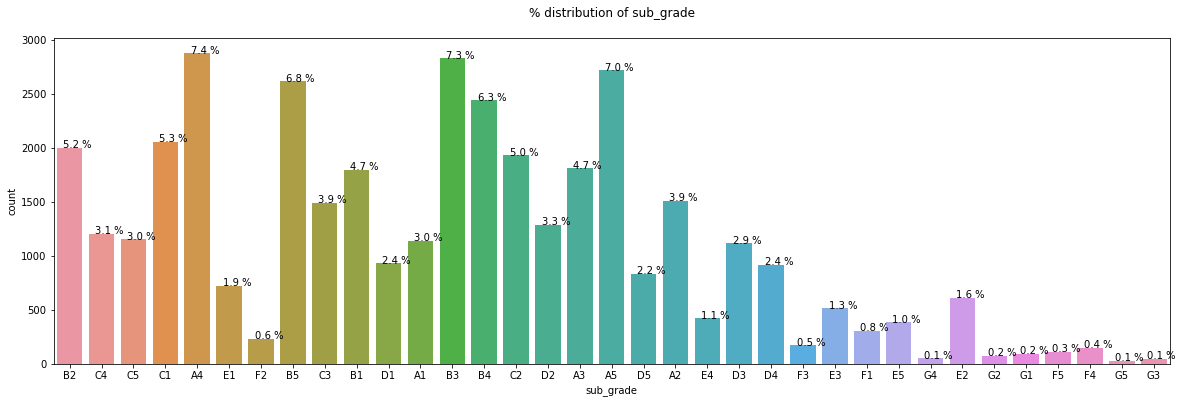

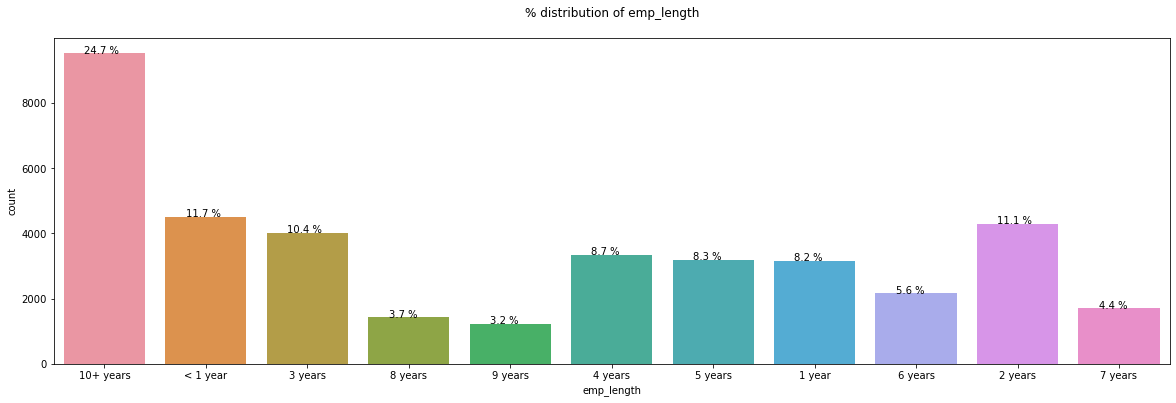

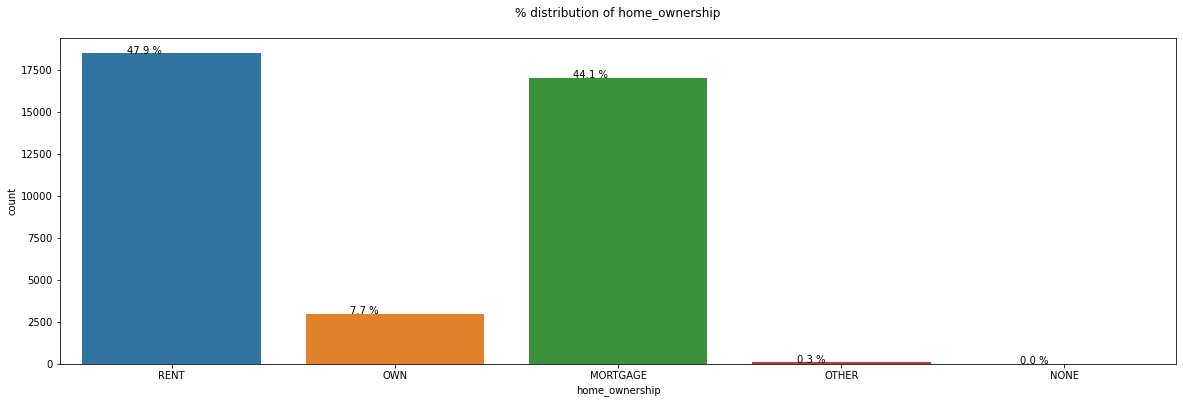

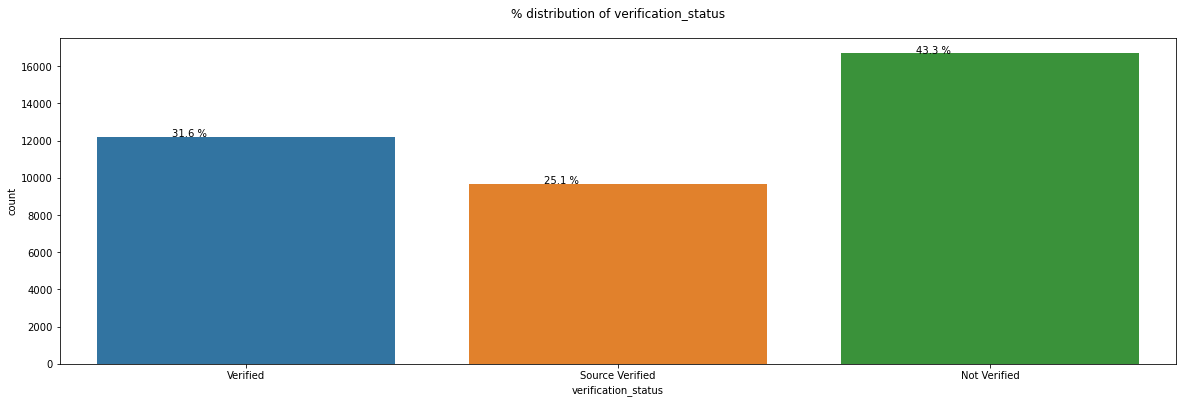

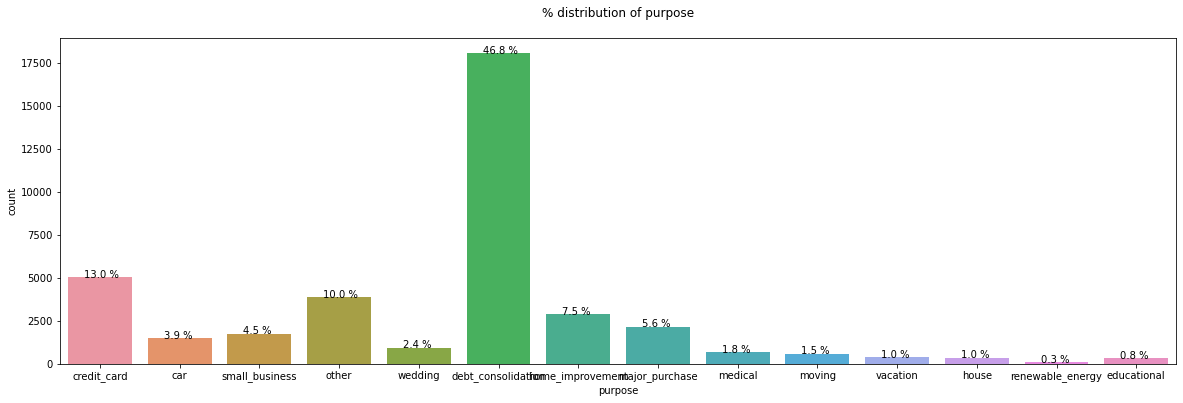

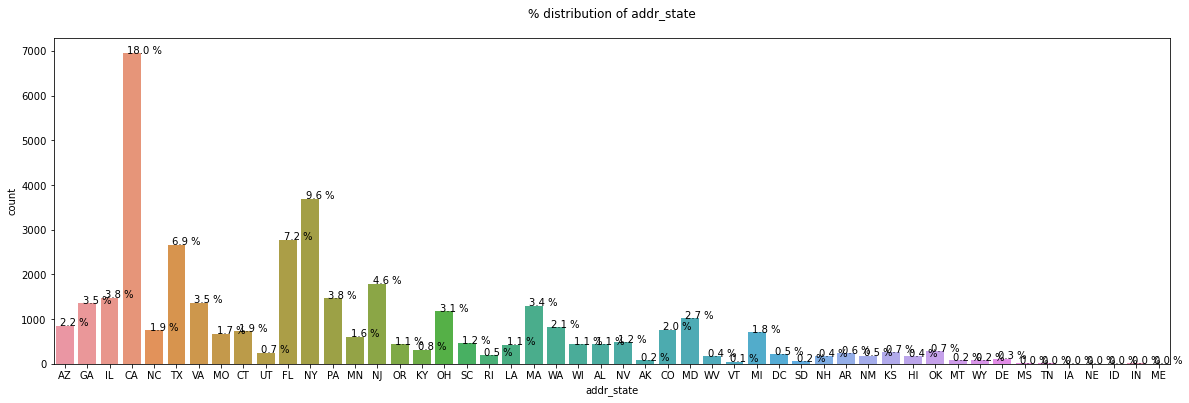

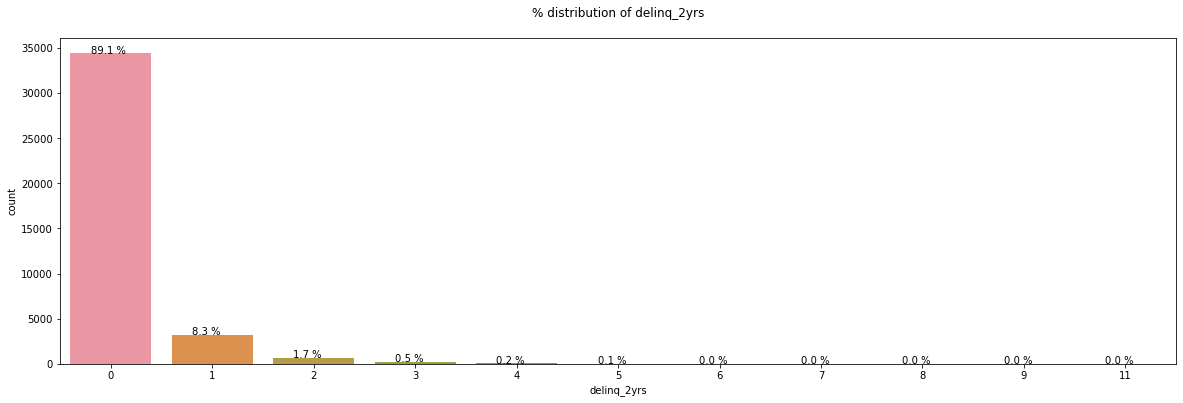

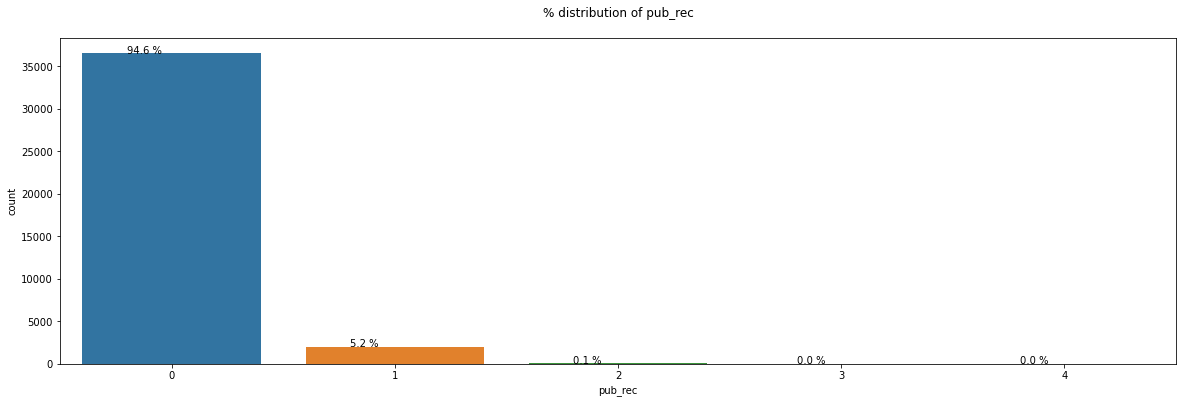

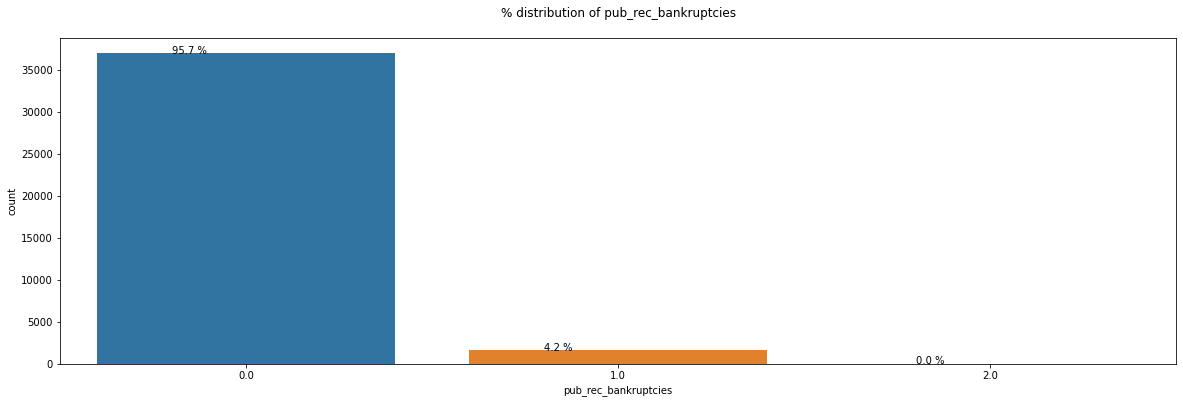

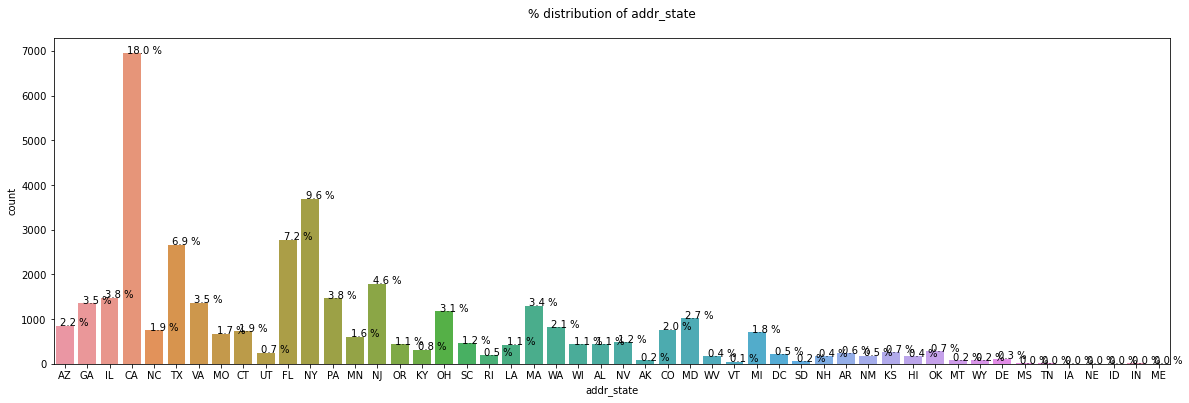

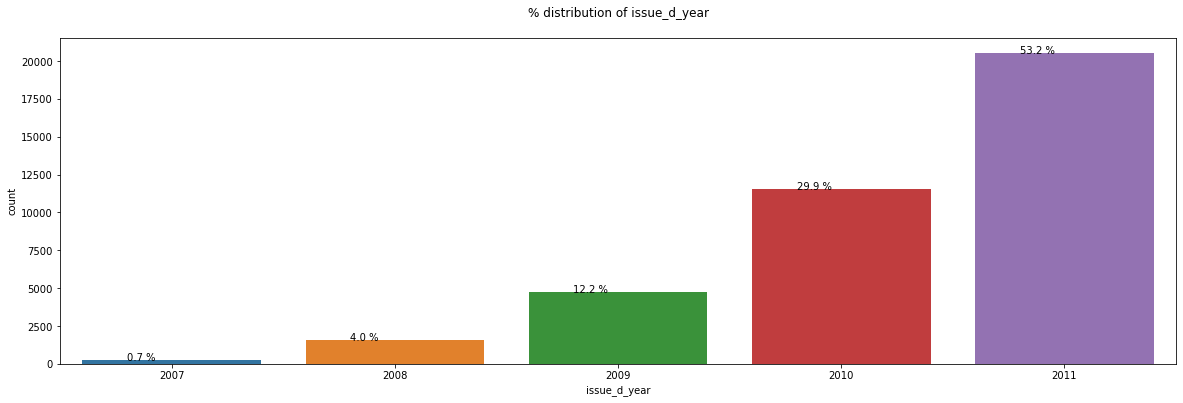

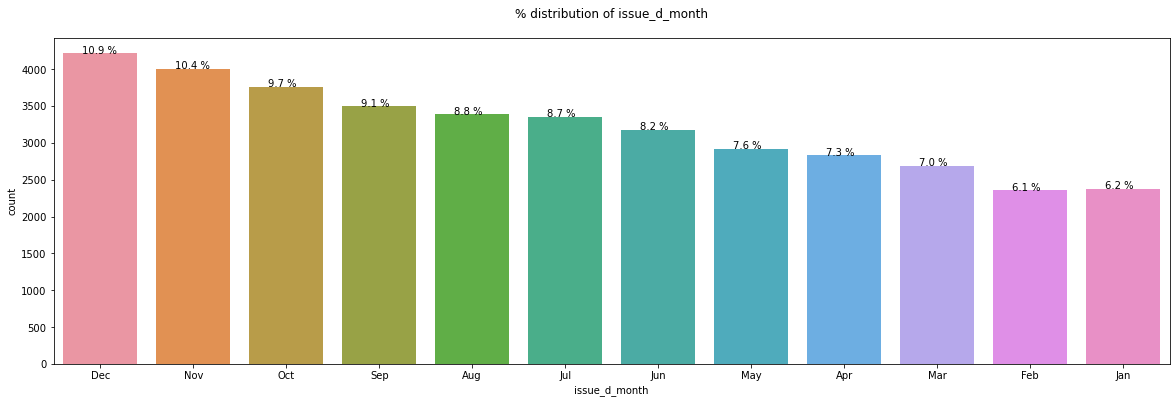

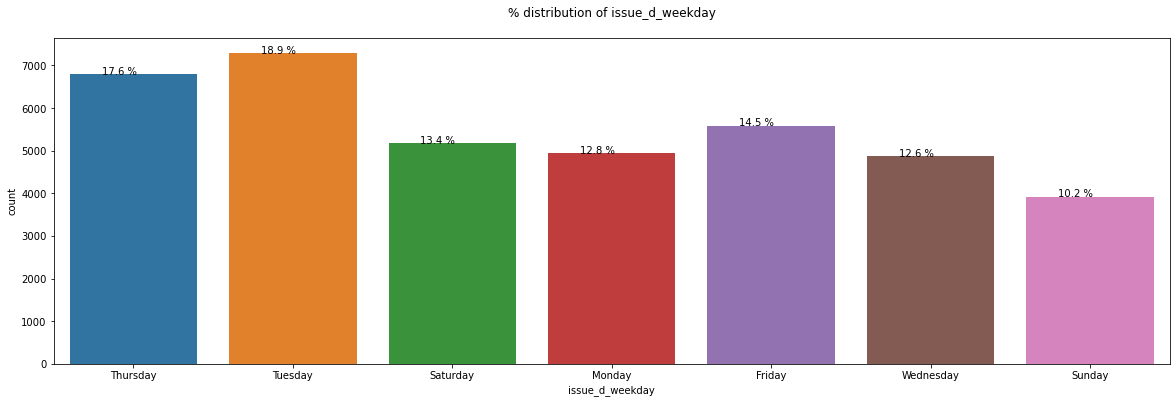

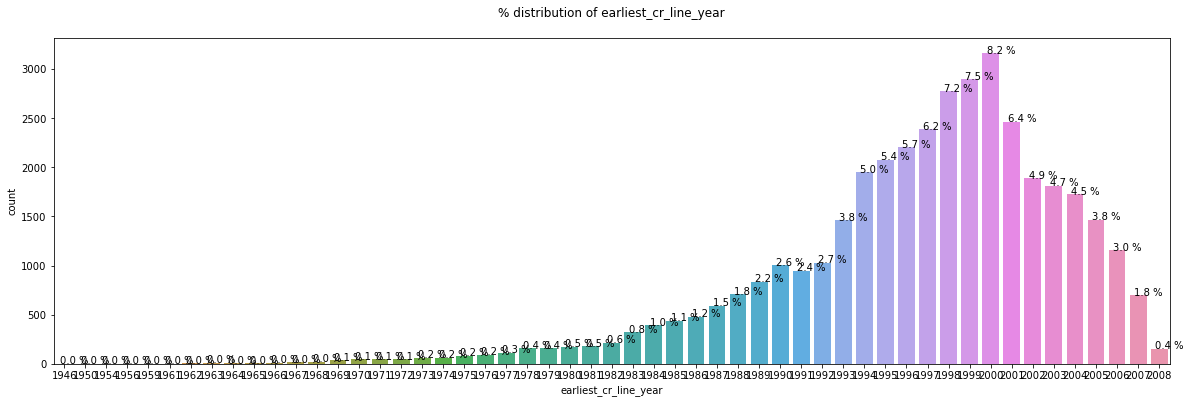

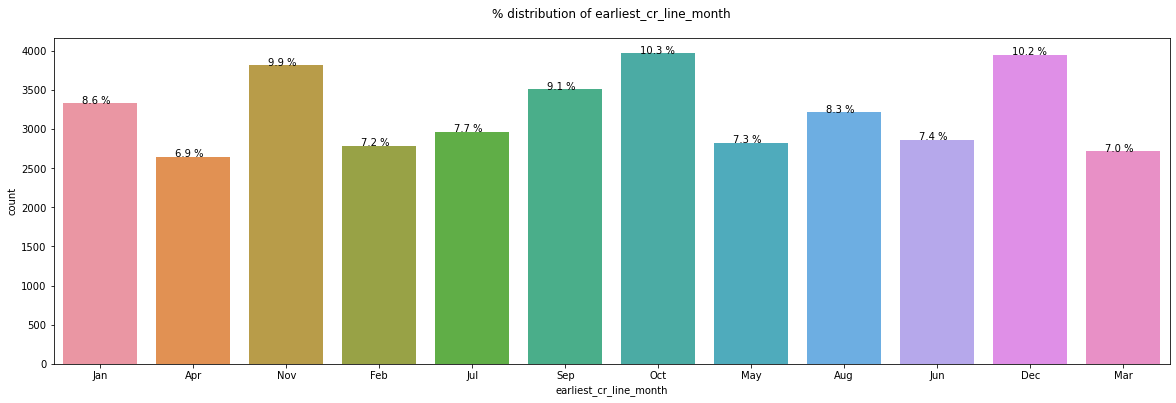

In [49]:
for i in cat_variable_list:
    plt.figure(figsize=(20,6))
    plt.title("% distribution of "+i+"\n")
    plt.xticks(rotation=0)
    ax = sns.countplot(df1[i])
    for p in ax.patches:
        ax.annotate('{:,.1f} %'.format(p.get_height()/df1.shape[0]*100), (p.get_x()+0.2, p.get_height()+0.1))
    plt.show()

### 2. Observations - Categorical Data

#### 1) loan_status: 85% of the borrowers paid the loan fully. 14% are charged off or default
#### 2) term: 3/4th of the borrowers are taken 36 months tenure loans
#### 3) grade: More than 50% of the borrowers are from grade A & B
#### 4) emp_length: 1/4th of the borrowers are 10+ years of employment length, followed by <1 year (~12 %)
#### 5) home_ownership: Most of the borrowers are having rented & mortgage houses
#### 6) verification_status: Strange, 43% of the borrowers got loan with out verifications
#### 7) purpose: ~47% of the loans are taking loan for debt consolidation
#### 8) address: Most of the borrowers are from CA and NY 
#### 9) delinq_2yrs: ~90% of borrowers are not deliquent in last 2 years
#### 10) pub_rec: ~95% of the borrowers are have no public derogatory records.
#### 11) pub_rec_bankruptcies : 4.2% of the borrowers are went bankruptcies
#### 12) issue_year : Exponential growth, 53% of the borrowers took loan in 2011
#### 13) issue_week : Most of the loans are issued on Tuesday and Thursday, than other days
#### 14) earliest_cr_line_month : Most of the borrowers are getting earlier credit line in 2000 and on month wise it's in Oct, Nov, Dec

### 3. Segmented Univariate Analysis

### a)  v/s Loan Amount

In [50]:
cat_variable_list = ['loan_status','term','grade','emp_length', 'home_ownership','verification_status','issue_d_year', 'issue_d_month','addr_state']

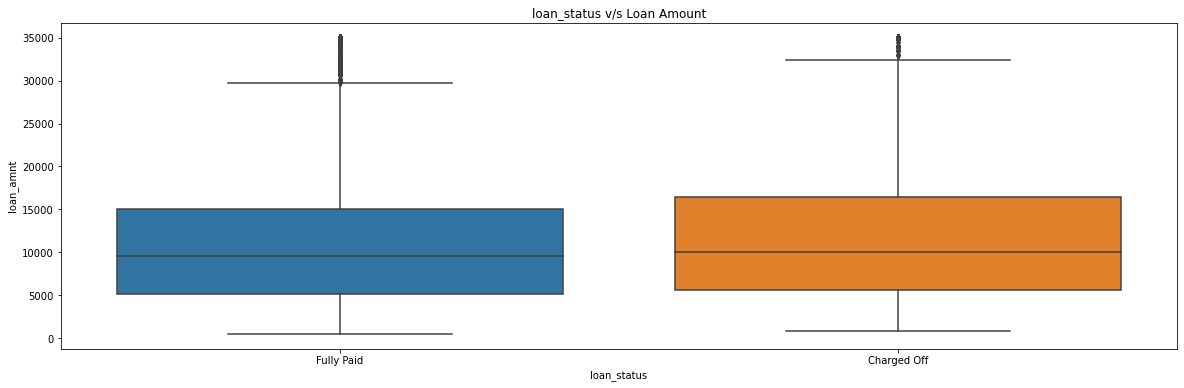

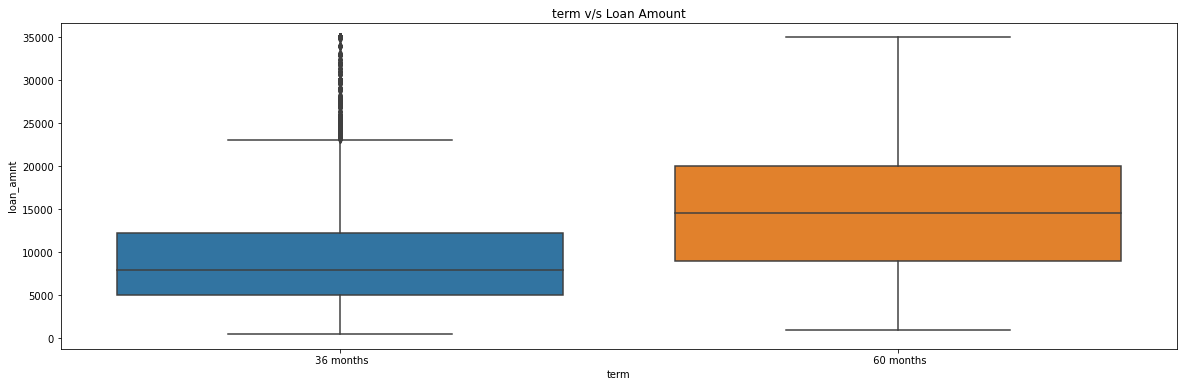

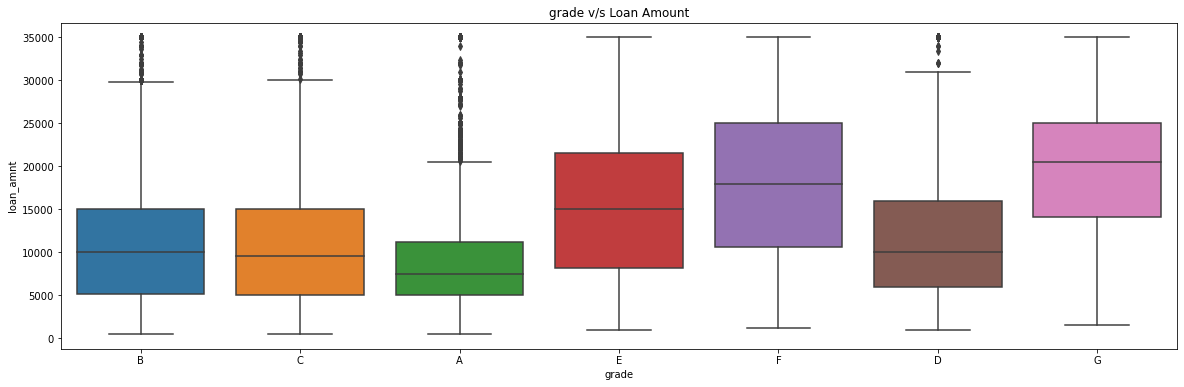

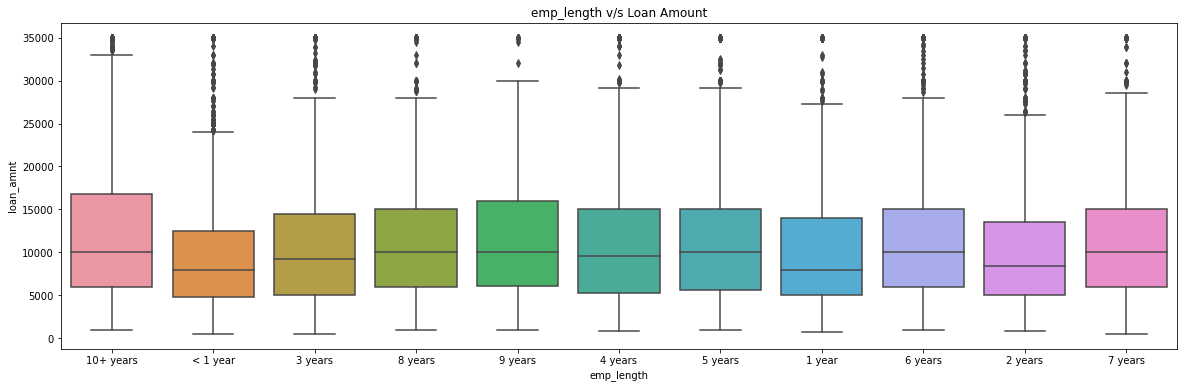

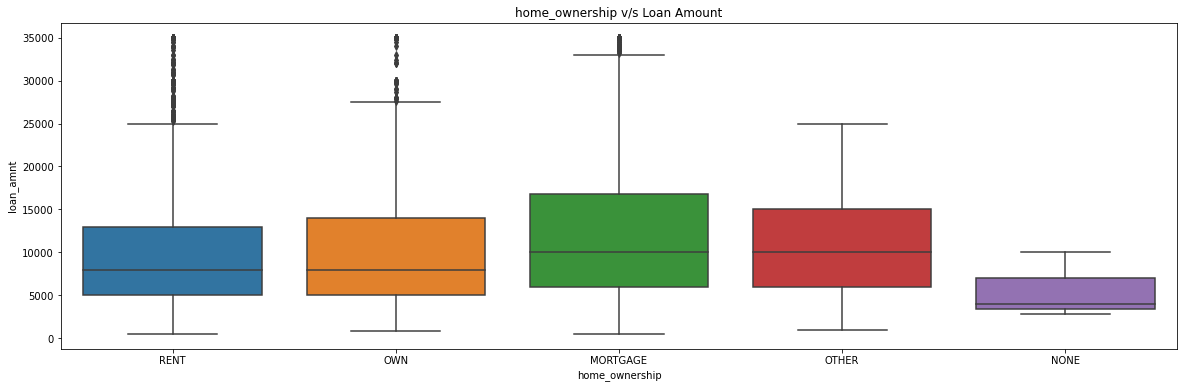

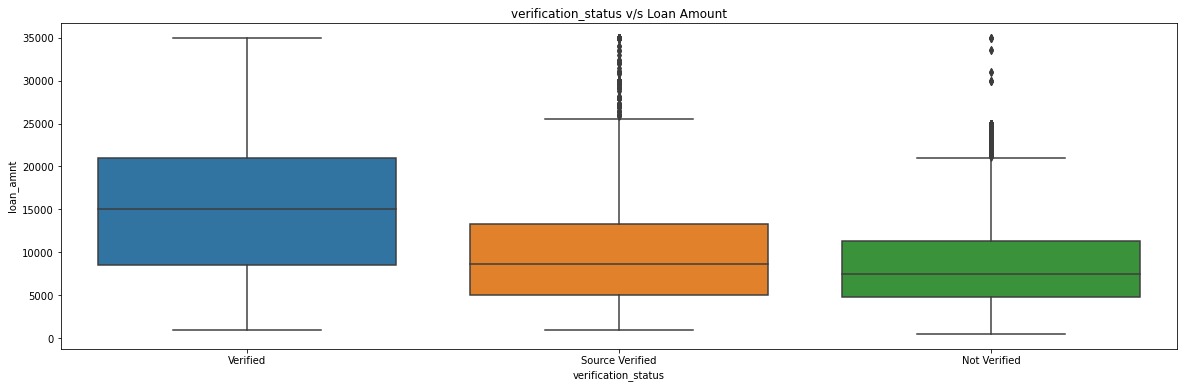

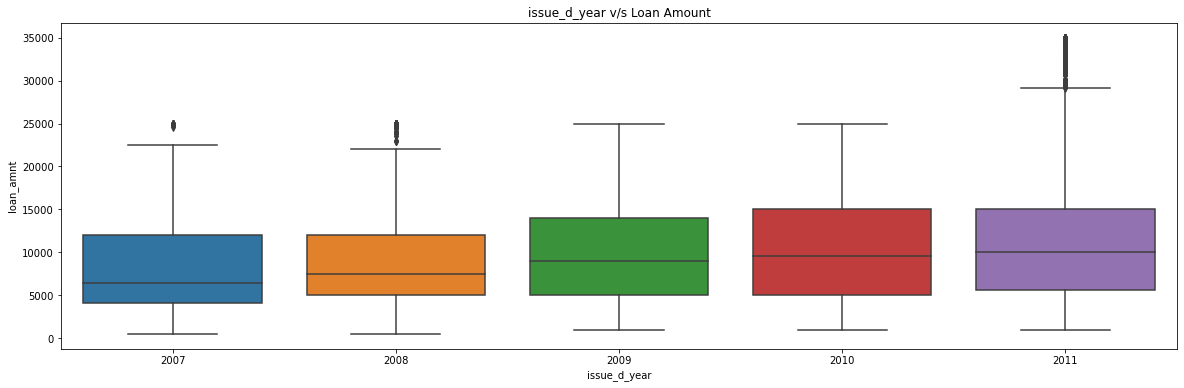

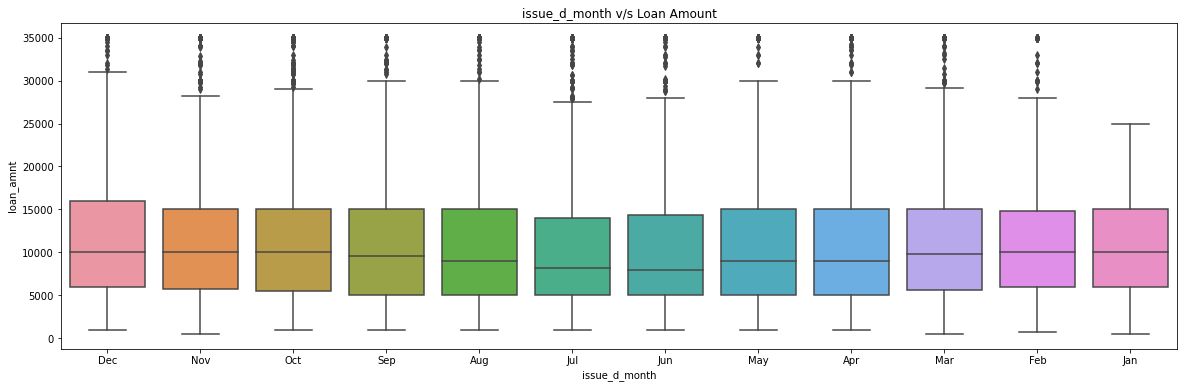

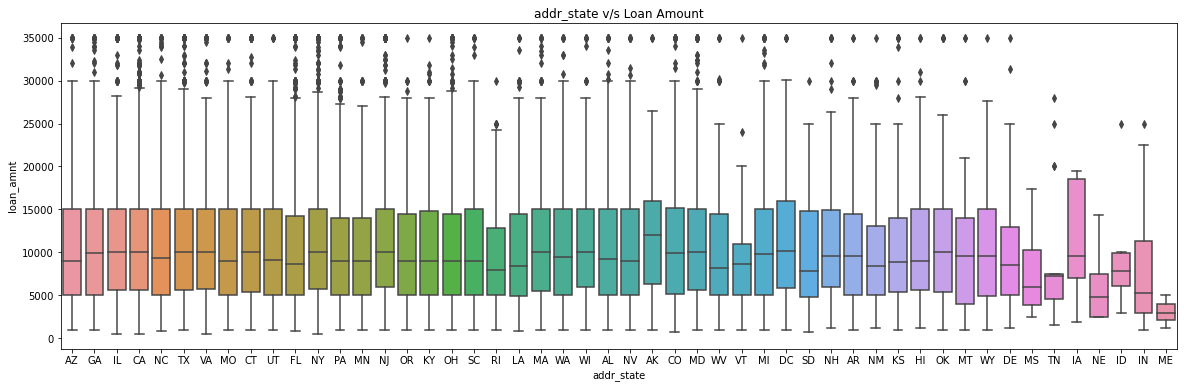

In [51]:
for i in cat_variable_list:
    plt.figure(figsize=(20,6))
    plt.title(i+" v/s Loan Amount")
    plt.xticks(rotation=0)
    ax = sns.boxplot(x = df1[i], y=df1['loan_amnt'])
    plt.show()

### 3. Observations -Segmented Univariate Analysis

#### 1) loan_status v/s Loan amount: Charge off customers have higher loan amount than fully paid
#### 2) term v/s Loan amount: Higher tenure have higher loan amount
#### 3) grade v/s Loan amount: Lower grades have higher loan amount
#### 4) emp_length v/s Loan amount: Borrowers with more experience choose higher loan amount
#### 5) home_ownership v/s Loan amount: Customers with mortgage are having higher loan amount
#### 6) verification_status v/s Loan amount: Verified customers are getting more loan amount (>9k USD)
#### 7) issue_year v/s Loan amount: Custoemrs took higher amount loan in 2008 and 2011
#### 8) issue_month v/s Loan amount: Except december month, custoemrs took similar amount loan

### b) v/s Interest Rate

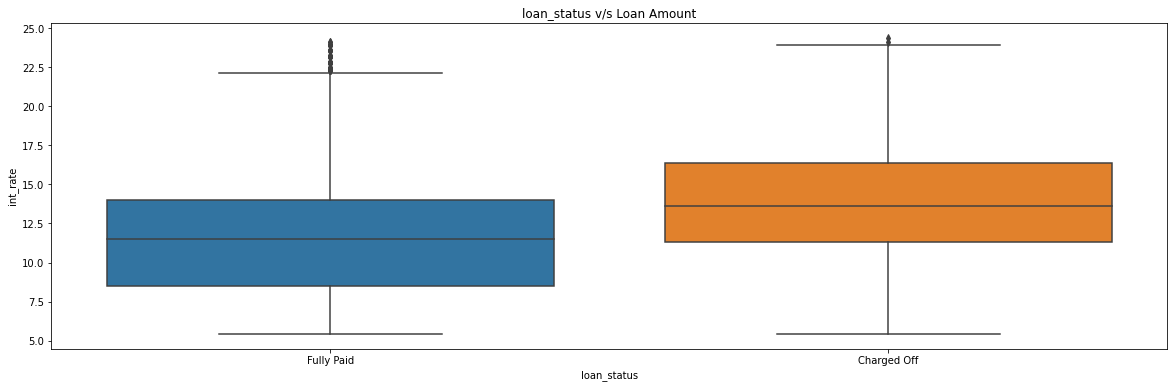

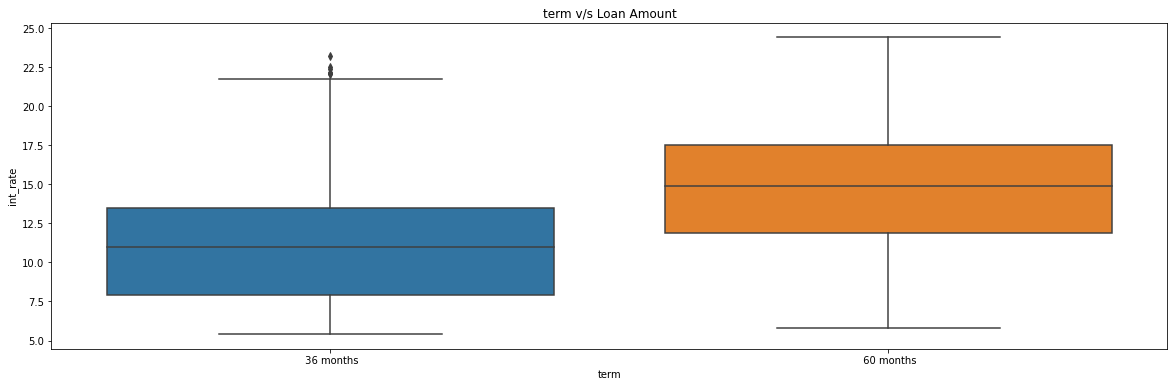

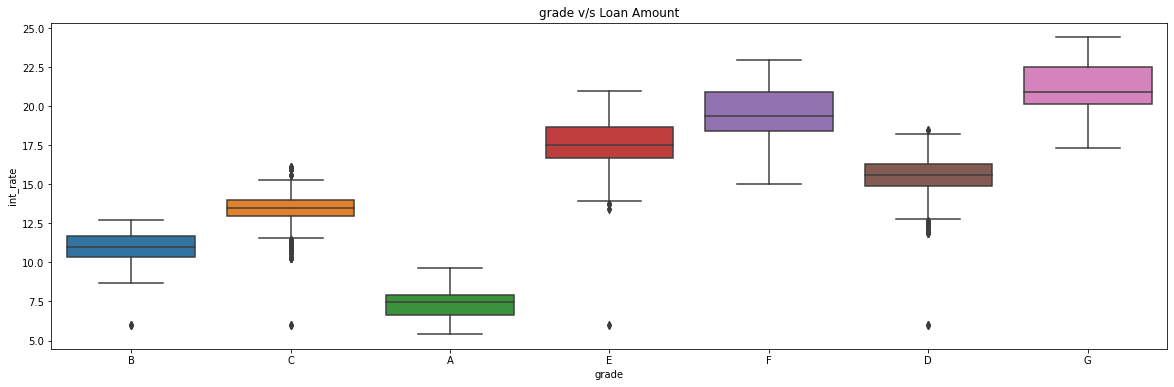

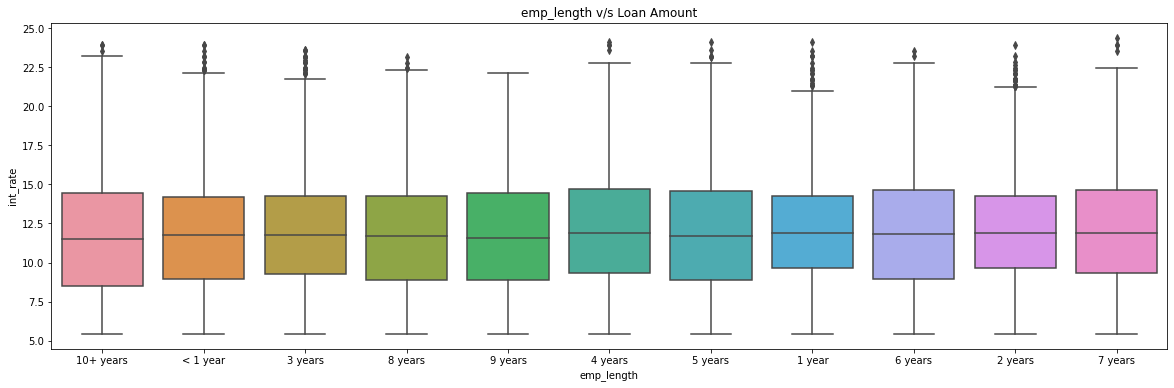

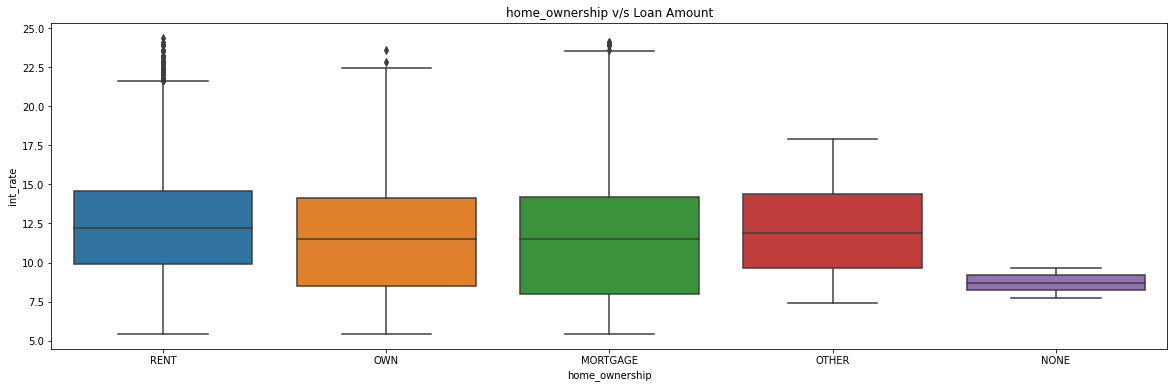

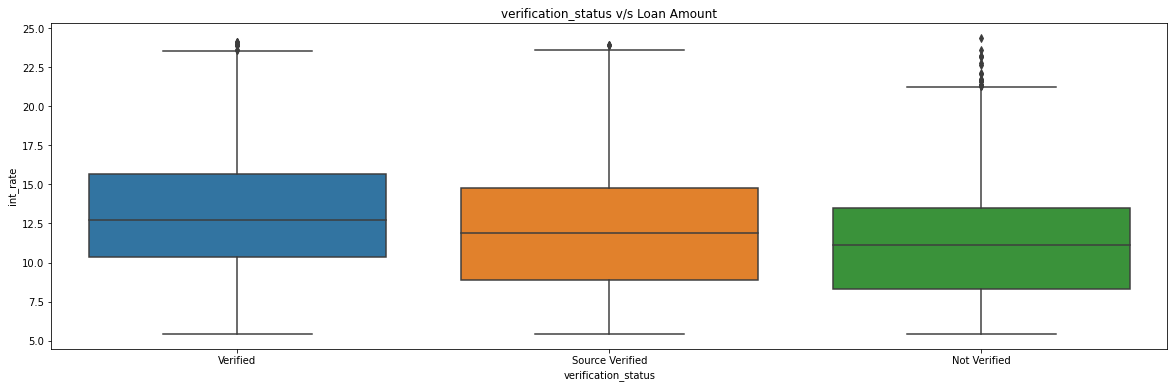

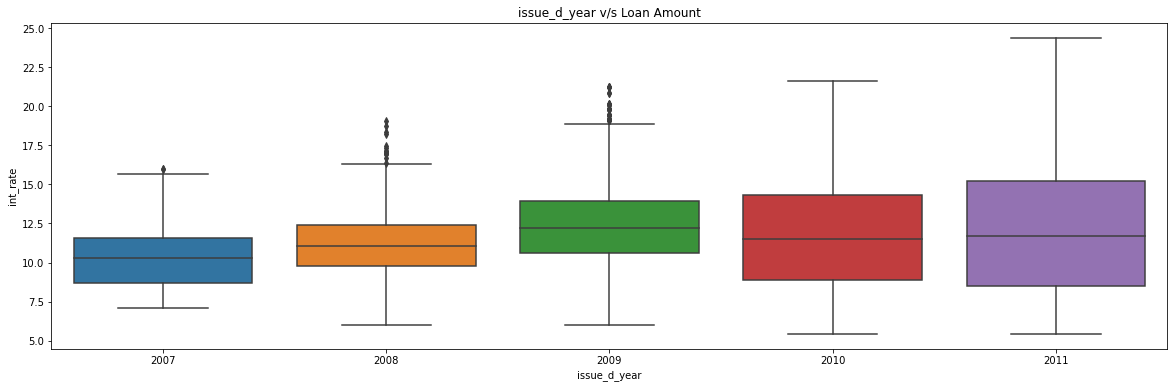

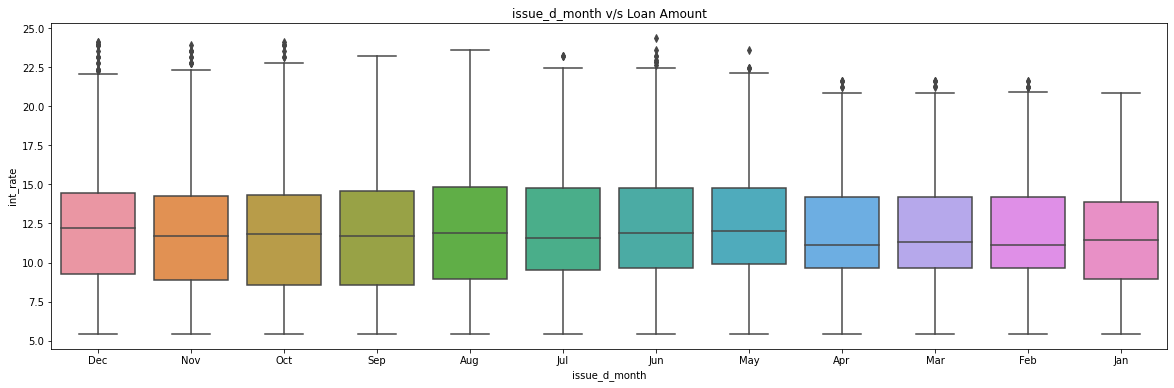

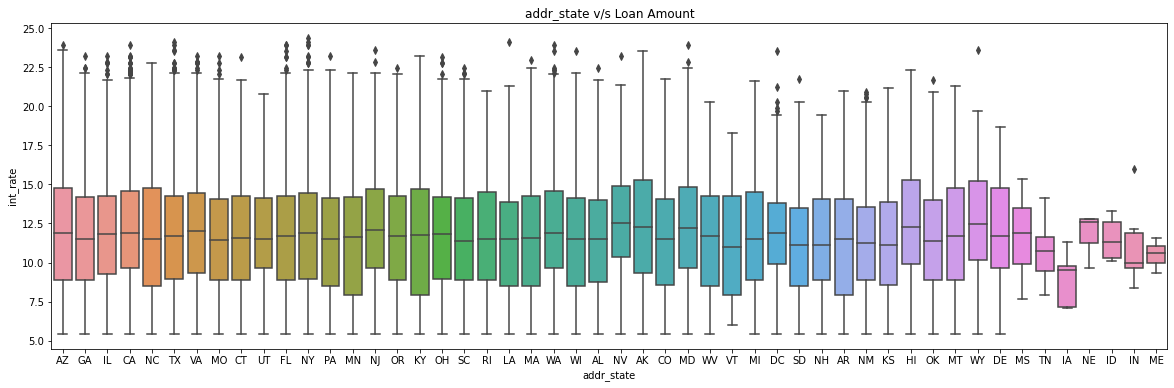

In [52]:
for i in cat_variable_list:
    plt.figure(figsize=(20,6))
    plt.title(i+" v/s Loan Amount")
    plt.xticks(rotation=0)
    ax = sns.boxplot(x = df1[i], y=df1['int_rate'])
    plt.show()

### 4. Observations -Segmented Univariate Analysis

#### 1) loan_status v/s interest Rate: Customers with higher interest rate are becoming charged off 
#### 2) term v/s interest Rate: Higher tenure have higher interest Rate
#### 3) grade v/s interest Rate: Lower grades have higher interest Rate
#### 4) emp_length v/s interest Rate: interest Rate be constant irrespective of the employment tenure
#### 5) home_ownership v/s interest Rate: If we ignore None category, customers with mortgage and own are getting lesser interest rate
#### 6) verification_status v/s interest Rate:Interestingly non-verified customers gets less interest loans, this is because non verified are with less loan amount

### 4. Bivariate Analysis

In [53]:
cat_variable_list = ['term','grade','purpose','home_ownership','addr_state']

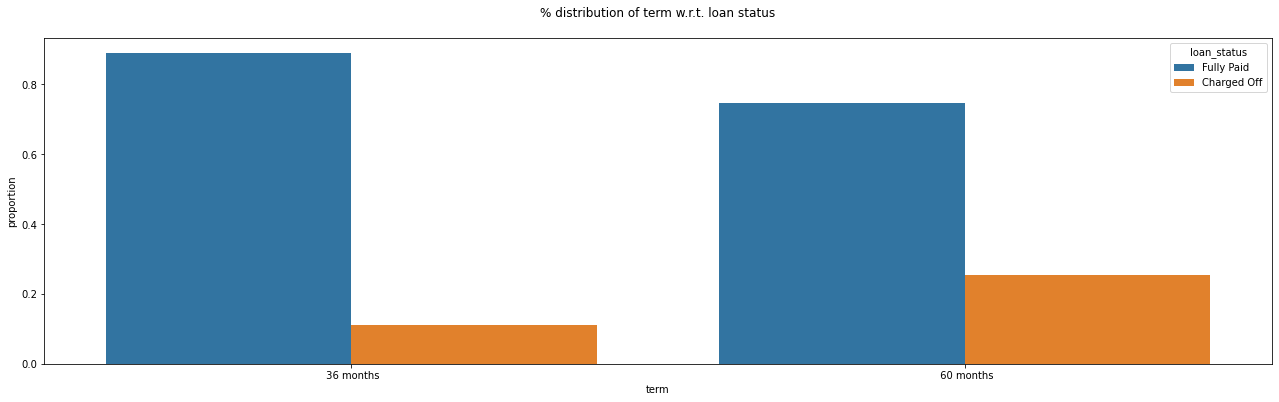

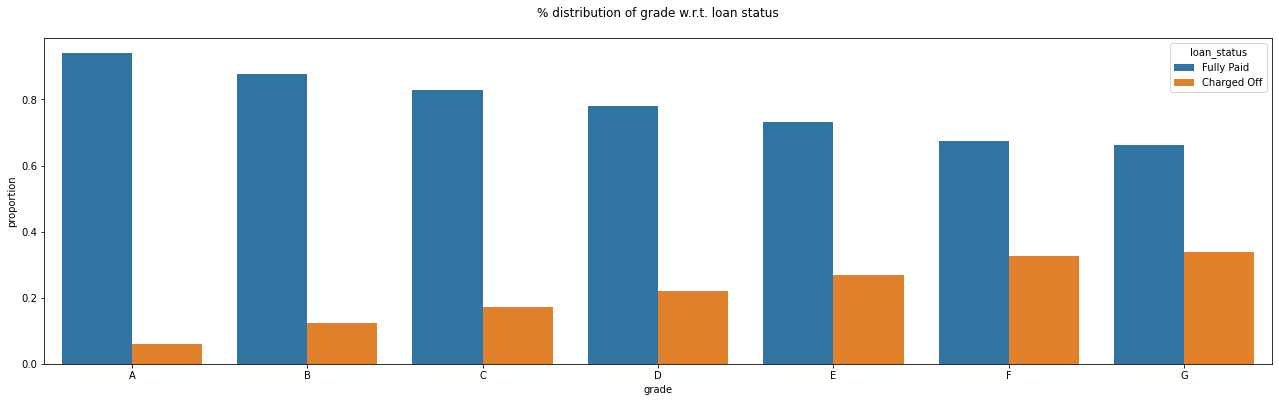

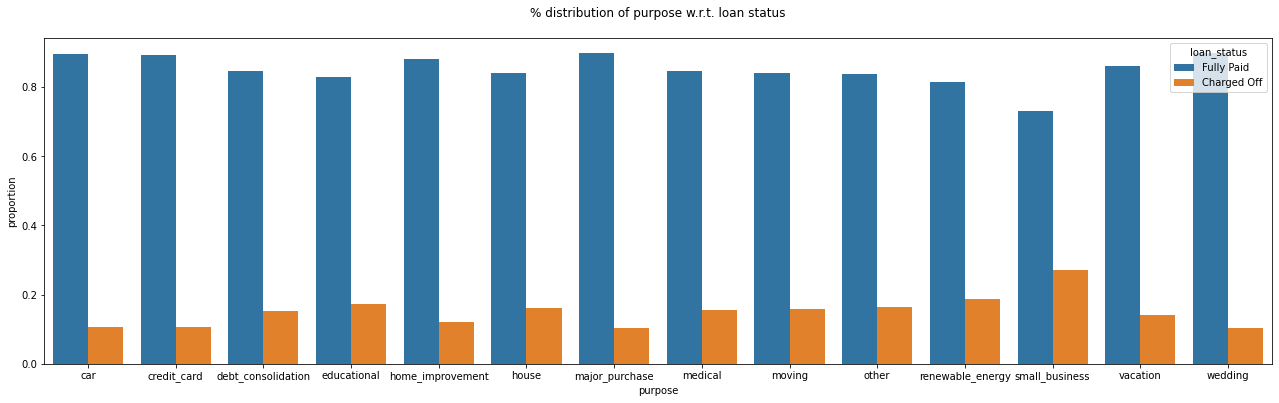

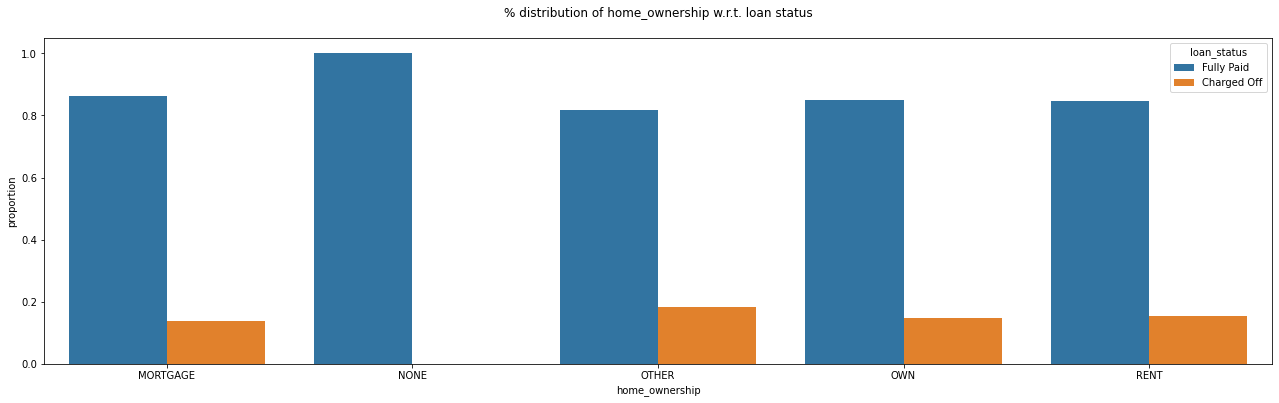

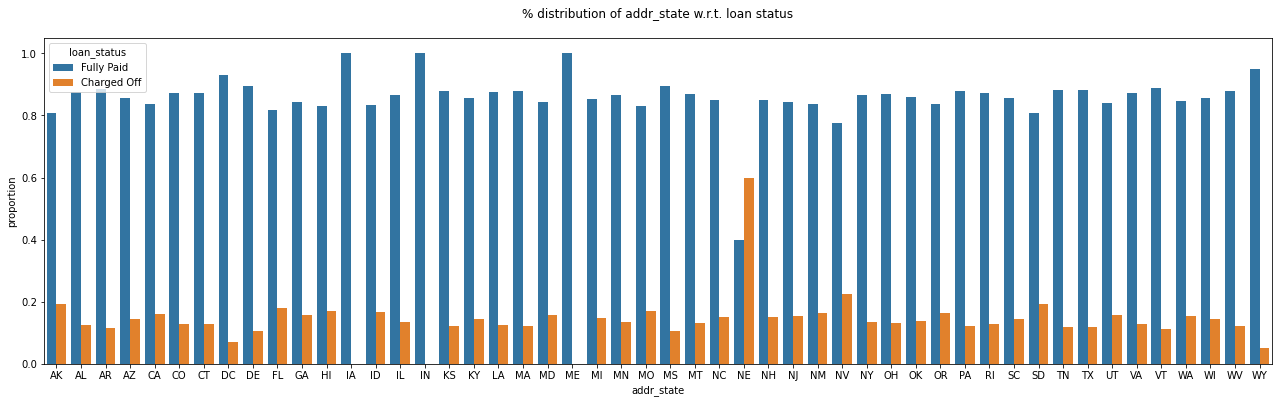

In [54]:
for i in cat_variable_list:
    plt.figure(figsize=(22,6))
    plt.title("% distribution of "+i+" w.r.t. loan status\n")
    plt.xticks(rotation=0)
    df2 = df1.groupby([i, 'loan_status'], as_index=False)['id'].count()
    df2['proportion'] = df2.groupby(i).transform(lambda x: x/x.sum())
    sns.barplot(x=i, y='proportion', hue='loan_status', data=df2, hue_order = ['Fully Paid', 'Charged Off'])
    plt.show()

### Checking where the charged off customers are from

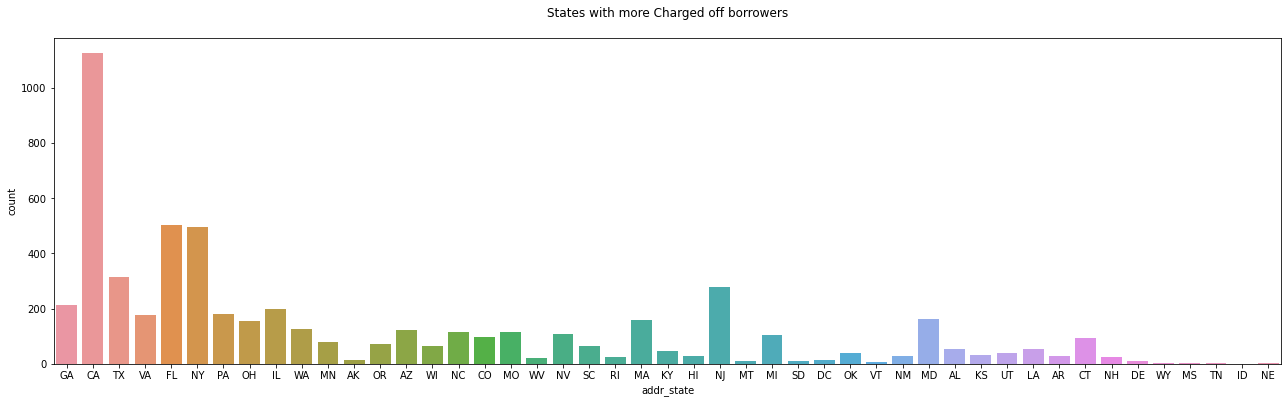

In [55]:
plt.figure(figsize=(22,6))
plt.title("States with more Charged off borrowers\n")
plt.xticks(rotation=0)
df_add = df1[df1['loan_status']=="Charged Off"]
sns.countplot(df_add['addr_state'])
plt.show()

### 4. Observations -Bivariate Analysis

#### 1) term: More portion of charged off customers are with higher tenure and fully paid proportion is higher in 36 months tenure
#### 2) grade: The graphs clearly indicates, lower the grades, higher the proportion of charged off customers
#### 3) purpose: customers took loan for small business are getting charged off more
#### 4) addr_state: Lending club stop giving loan to NE and take extra caution while providing loans to CA, FL and NY

###  Correlation matrix - Heat map

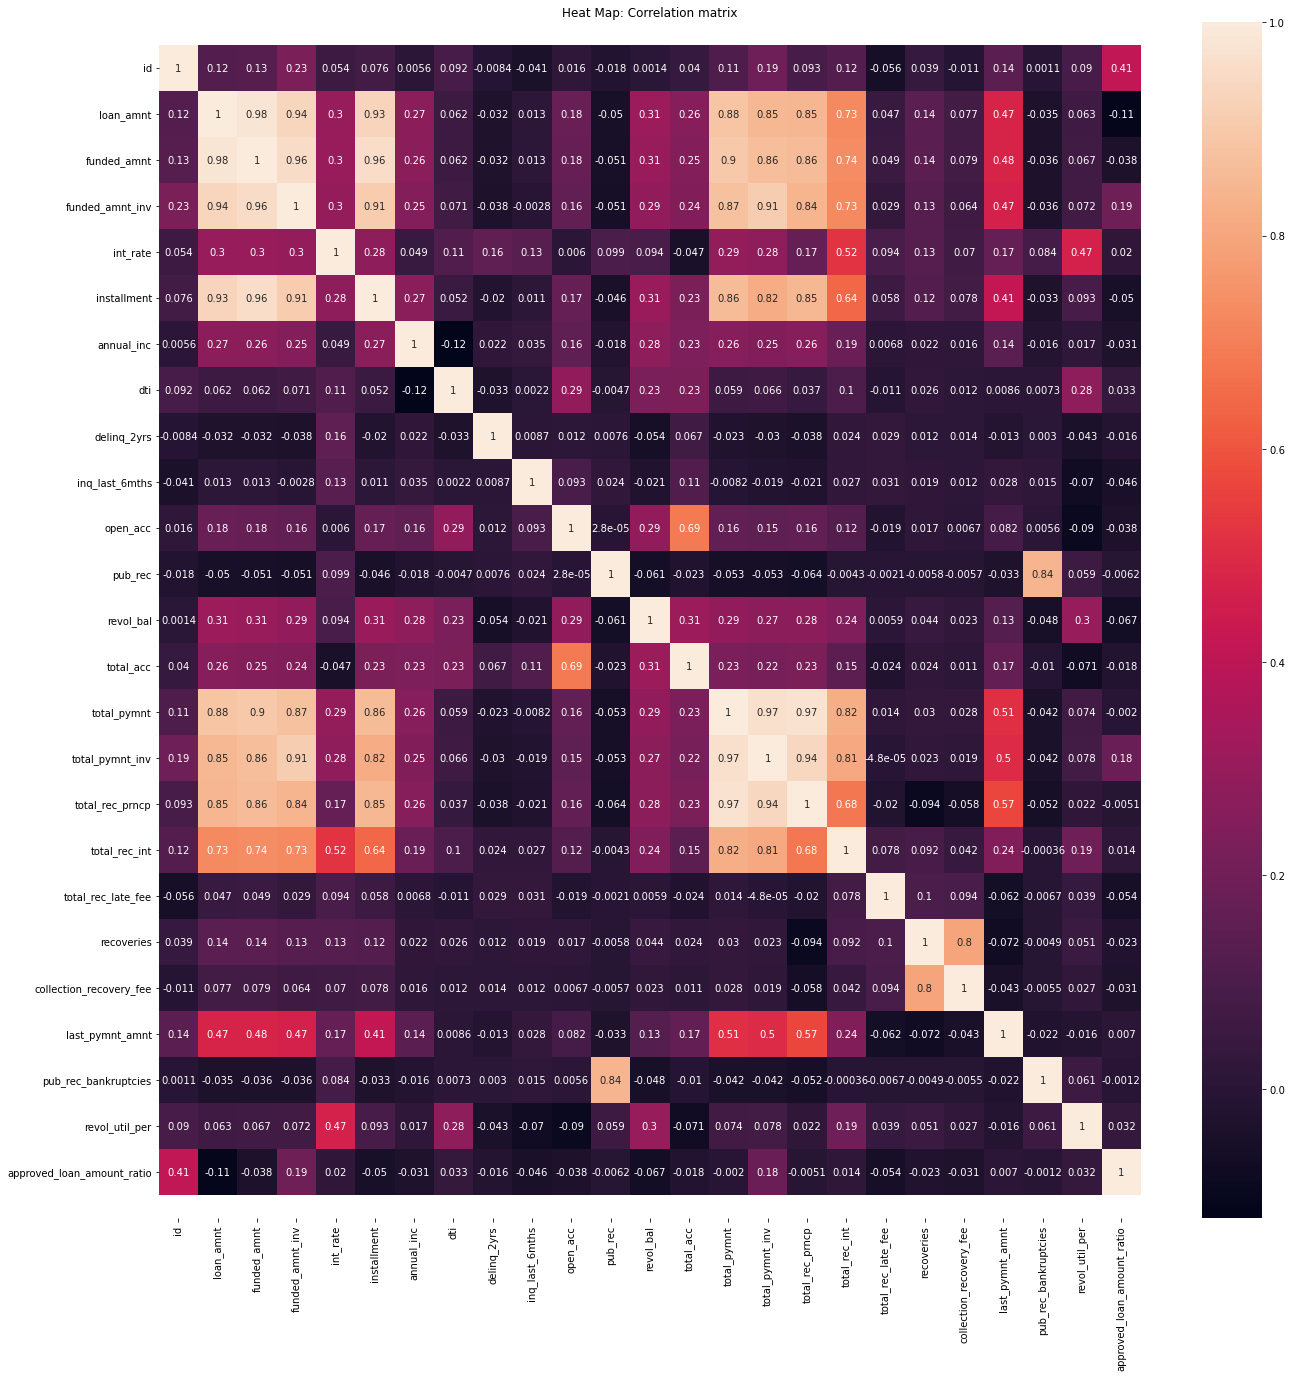

In [56]:
corr = df1.corr()
plt.figure(figsize=(22,22))
ax = sns.heatmap(corr, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Heat Map: Correlation matrix")
plt.show()

#### The public derogatory records colummn is highly positively correlated with public bankruptcies records

### Recommendations

#### 1) Interest rate on higher tenure (60 months) loans has to be reduced further to control the default rate
#### 2) Strong correlation has been observed between public derogatory and public bankruptcies. Lending club should not give any loans to customers with public derogatory records
#### 3) Loans given to Small business are tend to default more. LC should reduce or not give loan to this segment
#### 4) Lower the grades, higher the proportion of charged off customers. Take more information and actions before issuing loans to lower grade category
#### 5) Mortgage home ownership are taking higher amount of loan and becoming default. Set the range for this category and limit to max 15k USD
#### 6) Lending club stop giving loan to NE and take extract caution while providing loans to CA, FL and NY cities
#### 7) Higher the interest rate more the charged off customers. Take action on fixing the interest rate for different category of loans